In [1]:
import squigglepy as sq
import numpy as np

from datetime import datetime
from pprint import pprint

from libs import run_model, calculate_doubling_time, plot_exponential_growth, analyze_agi_arrival
from params import start_task_length, agi_task_length, doubling_time, acceleration, shift


O3_LAUNCH_DATE = datetime(2025, 4, 16)
CLAUDE_3P7_LAUNCH_DATE = datetime(2025, 2, 24)

print('Loaded libraries')

## START task length (displayed in min) ##
{1: 0.02,
 5: 0.02,
 10: 0.02,
 20: 0.03,
 30: 0.07,
 40: 0.15,
 50: 0.32,
 60: 0.66,
 70: 1.39,
 80: 3.3,
 90: 10.01,
 95: 24.64,
 99: 110.05}



## AGI task length (displayed in hrs) ##
{1: 40,
 5: 50,
 10: 80,
 20: 139,
 30: 207,
 40: 293,
 50: 401,
 60: 551,
 70: 775,
 80: 1165,
 90: 2017,
 95: 3148,
 99: 7355}



## DOUBLING TIME (displayed in days) ##
{1: 115,
 5: 118,
 10: 118,
 20: 147,
 30: 165,
 40: 181,
 50: 199,
 60: 212,
 70: 212,
 80: 212,
 90: 223,
 95: 243,
 99: 284}



## ACCELERATION
{1: 0.902,
 5: 0.977,
 10: 0.999,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.002,
 95: 1.023,
 99: 1.104}



## SHIFT (displayed in days) ##
{1: 0,
 5: 30,
 10: 57,
 20: 89,
 30: 112,
 40: 131,
 50: 150,
 60: 168,
 70: 188,
 80: 211,
 90: 244,
 95: 270,
 99: 320}
Loaded libraries


In [2]:
def adapted_metr_model():
    start_task_length_ = start_task_length * (2 ** (shift / doubling_time))
    days = calculate_doubling_time(start_task_length_, agi_task_length, doubling_time, acceleration)
    measurement_error_variance = sq.invlognorm(0.8, 1.5) # Add measurement error on tasks: SD fit to trend variance from Figure 12
    return days * measurement_error_variance

samples = run_model(adapted_metr_model, index_date=O3_LAUNCH_DATE, cores=4)

Generating samples with 4 cores...


100%|███████████████████████████████████████████████████████████████████████████| 100000/100000 [00:26<00:00, 3710.49it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1364.33it/s]


...Collected!
{1: 932,
 5: 1405,
 10: 1682,
 20: 2078,
 30: 2403,
 40: 2713,
 50: 3018,
 60: 3345,
 70: 3715,
 80: 4166,
 90: 4831,
 95: 5433,
 99: 6654}

-

{1: '2027 Nov 04',
 5: '2029 Feb 19',
 10: '2029 Nov 23',
 20: '2030 Dec 24',
 30: '2031 Nov 14',
 40: '2032 Sep 20',
 50: '2033 Jul 22',
 60: '2034 Jun 13',
 70: '2035 Jun 18',
 80: '2036 Sep 11',
 90: '2038 Jul 08',
 95: '2040 Mar 02',
 99: '2043 Jul 05'}


In [3]:
analyze_agi_arrival(samples)

## DISTRIBUTION OF AGI ARRIVAL DATE ##
1%: 2027.6
2%: 2028.1
3%: 2028.4
4%: 2028.6
5%: 2028.8
10%: 2029.6
15%: 2030.2
20%: 2030.7
25%: 2031.2
35%: 2032.0
50%: 2033.3
60%: 2034.2
75%: 2035.7
80%: 2036.4
90%: 2038.2
95%: 2039.9


## DISTRIBUTION OF RELATIVE AGI ARRIVAL DATE ##
1%: 2.6 years from now
2%: 3.1 years from now
3%: 3.4 years from now
4%: 3.6 years from now
5%: 3.8 years from now
10%: 4.6 years from now
15%: 5.2 years from now
20%: 5.7 years from now
25%: 6.2 years from now
35%: 7.0 years from now
50%: 8.3 years from now
60%: 9.2 years from now
75%: 10.7 years from now
80%: 11.4 years from now
90%: 13.2 years from now
95%: 14.9 years from now
(Mean: 9 years from now)


## AGI ARRIVAL DATE BY BIN ##
2025: 0.0%
2026: 0.3%
2027: 1.5%
2028: 4.0%
2029: 7.5%
2030-2031: 21.5%
2032-2034: 33.6%
2035-2039: 26.8%
2040-2049: 4.7%
2050-2059: 0.0%
2060-2069: 0.0%
2070-2079: 0.0%
2080-2089: 0.0%
2090-2099: 0.0%
>2100: 0.0%


## AGI ARRIVAL DATE BY YEAR ##
By EOY 2025: 0.0%
By EOY 2026: 0.4%
B

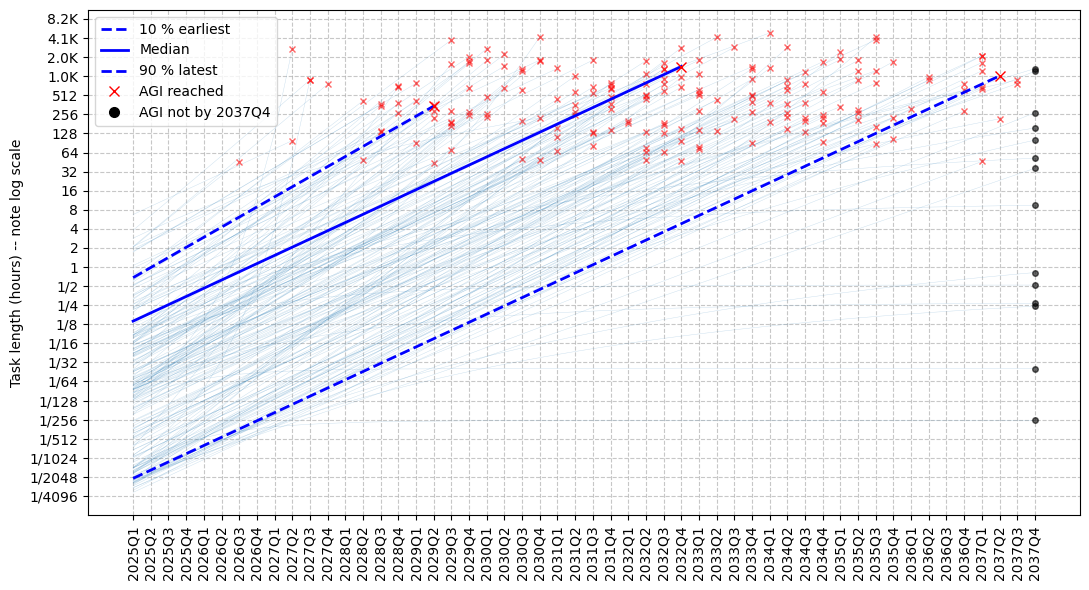

In [4]:
plot_exponential_growth(
    doubling_time_days=doubling_time,
    starting_hours=start_task_length,
    agi_task_length=agi_task_length,
    shift=shift,
    acceleration=acceleration,
    n_quarters=51,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)